In [1]:
# Reference: https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/07_linear_models/01_linear_regression_intro.ipynb

### Stochastic Gradient Descent Regression (SGDRegressor)

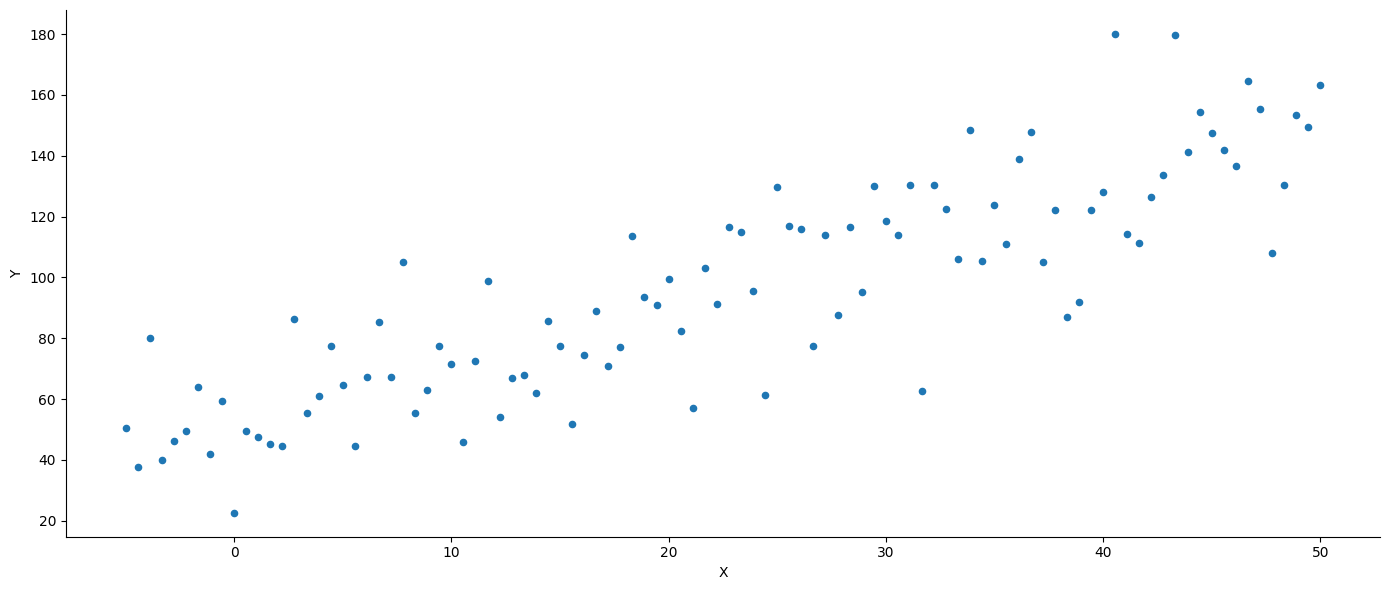

/Users/test1/py_env/rpa/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


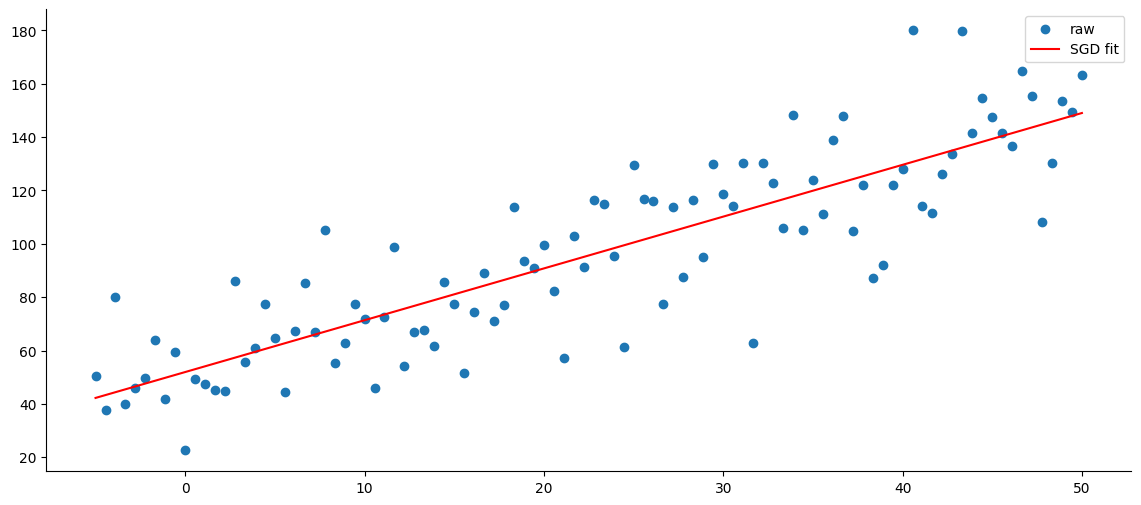

coef (scaled): 31.146794886625532
intercept: [95.63400611]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# 1. 造数据 build data
x = np.linspace(-5, 50, 100)
# y = β1 + β1 * x + ε
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})

# 2. 画图 plot data
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()
plt.show()

# 3. 标准化 standardize data
scaler = StandardScaler()
X_ = scaler.fit_transform(data[['X']])

# 4. 训练 train model
# Scikit-learn <=1.2: squared_loss;  Scikit-learn >=1.3: squared_error
sgd = SGDRegressor(loss='squared_error',  
                   fit_intercept=True,
                   shuffle=True,
                   random_state=42,
                   learning_rate='invscaling',
                   eta0=0.01,
                   power_t=0.25)

sgd.fit(X_, data['Y'].values)

# 5. 预测并画图 predict and plot
# x_plot = np.linspace(-5, 50, 300).reshape(-1, 1)
x_plot = x.reshape(-1, 1)
x_plot_scaled = scaler.transform(x_plot)
y_pred = sgd.predict(x_plot_scaled)

plt.figure(figsize=(14, 6))
plt.scatter(data['X'], data['Y'], label='raw')
plt.plot(x_plot, y_pred, color='red', label='SGD fit')
sns.despine()
plt.legend()
plt.show()

# 6. 参数  get model parameters
print("coef (scaled):", sgd.coef_[0])
print("intercept:", sgd.intercept_)


In [3]:
μ = scaler.mean_[0]      # 均值             mean
σ = scaler.scale_[0]     # 标准差           standard deviation (std)
std_β1 = sgd.coef_[0]         # 标准化后的斜率    coefficient (slope)
std_β0 = sgd.intercept_       # 标准化后的截距    intercept

β1 = std_β1 / σ
β0 = std_β0 - std_β1 * μ / σ

print("β1:", β1)
print("β0:", β0)

β1: 1.9422190378960196
β0: [51.93407775]
